# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)
print(data1)

shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 ...
 [ 2.01992 -0.31388  1.     ]
 [ 2.30028  0.22118  1.     ]
 [ 1.82426 -0.14913  1.     ]]


## plot the data

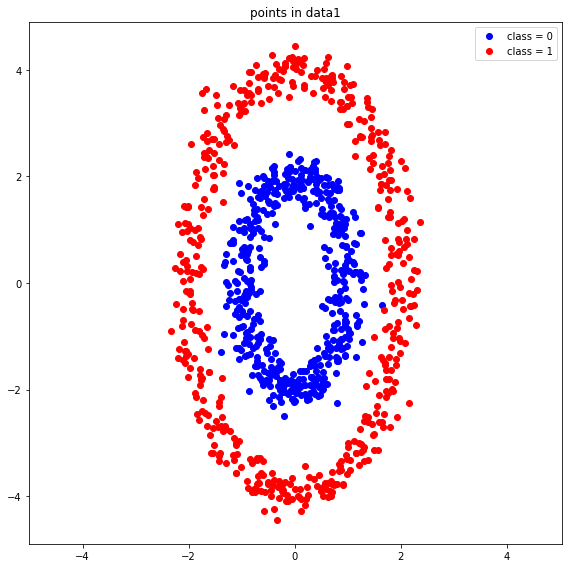

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

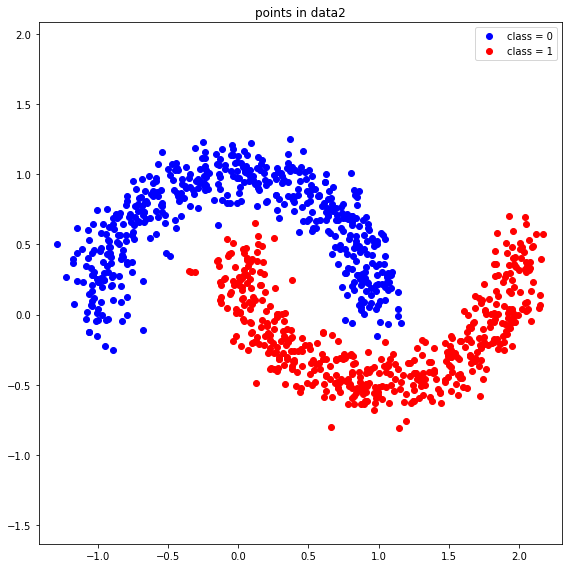

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    
    t1=(x-np.mean(x))/np.max(x-np.mean(x))
    t2=(y-np.mean(y))/np.max(y-np.mean(y))
    t1 = t1*1.14 ## more precisely
    t2 = t2/0.88 ## more precisely for variance
    
    t3=np.power(t1,2)+np.power(t2,2)
    t3 = np.log2(t3)
    
    
    t3[486] -=0.6 ## recalculate for two congestion part point number 306 486 for accuracy
    t3[306] -=0.4 ## 
    
    
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t3.T) #max(t3),min(t3)max(t1),min(t1),max(t2),min(t2)#
    #return feature
#print(compute_feature1(np.array( [ [1,2] ]))  )
#print(compute_feature1(data1_point))



(1, array([-2.57681888e+00, -2.47696267e+00, -2.03363919e+00, -1.80262888e+00,
       -1.50988125e+00, -2.94453016e+00, -1.30207052e+00, -2.15775467e+00,
       -2.08907180e+00, -3.36826383e+00, -2.37249657e+00, -1.70531717e+00,
       -1.82921854e+00, -2.25034534e+00, -2.75139707e+00, -3.01038307e+00,
       -1.67096366e+00, -1.73857354e+00, -1.51915842e+00, -1.98783284e+00,
       -1.46319702e+00, -3.37344702e+00, -1.62452882e+00, -2.02057825e+00,
       -2.79910162e+00, -1.24570350e+00, -1.82843787e+00, -2.07308893e+00,
       -3.49401916e+00, -1.27916281e+00, -2.14495983e+00, -2.20314085e+00,
       -3.02156347e+00, -1.94025851e+00, -1.54985114e+00, -2.14766821e+00,
       -2.26924200e+00, -1.86390322e+00, -2.15807222e+00, -2.07205785e+00,
       -1.35180198e+00, -1.76063246e+00, -2.35371548e+00, -1.91084998e+00,
       -2.02510820e+00, -1.95783258e+00, -2.52440666e+00, -2.30338201e+00,
       -2.09977919e+00, -3.45503444e+00, -1.84964666e+00, -1.70341096e+00,
       -2.10771213e+0

In [6]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    # 
    # 
    # 
    # 
    # k= np.zeros(len(point))
    # error =1/2#1.77 # y value verses x for classifing
    # error2  = 1/4
   
    # a= np.sqrt(np.power((x+1),2) +np.power((1-error2-y)*error,2))
    # b= np.sqrt(np.power((x-5/12),2) +np.power((1-error2-y)*error,2))
    # c=np.sqrt(np.power((x+5/12),2) +np.power((-1+error2-y)*error,2))
    # d=np.sqrt(np.power((x-1),2) +np.power((-1+error2-y)*error,2))
    # e=np.sqrt(np.power((x+1/3),2) +np.power((-1+error2-y)*error,2))
    # f=np.sqrt(np.power((x-1/3),2) +np.power((1+error2-y)*error,2))
    
    

    t=np.power(x,3)*1.43-np.power(x,2)*1.97-0.41*x+0.77-y
    






    # #a= np.power((x+5/6),2) +np.power((2/3-y),2)
    # #b= np.power((x-1/6),2) +np.power((2/3-y),2)
    # #c=np.power((x+1/6),2) +np.power((2/3+y),2)
    # #d=np.power((x-5/6),2) +np.power((2/3+y),2)
    # k= np.zeros(len(point))
    # for i in range(len(point)):
    #     k[i] = (a[i]+b[i]-c[i]-d[i])
        
        #k[i]=min(c[i],d[i],f[i])-min(a[i],b[i],e[i])
    
        #x   = point[:, 0]
        #y   = point[:, 1]
        #k=np.power(x,3)-(6/4)*(np.power(x,2))-(x/16)+15/32
        #k = 2*k-y
        #k -= (max(k)+min(k))/2

    #a1 = np.sqrt(np.power((x+3/4),2)+np.power((y-3/4),2))
    #b1 = np.sqrt(np.power((x-3/4),2)+np.power((y-3/4),2))
    #c1 = np.sqrt(np.power((x),2)+np.power((y+1/2),2))
    #d1 = np.sqrt(np.power((x-2),2)+np.power((y+1/2),2))
    #for i in range(1000):
        #k[i] = (c1[i]+d1[i]-a1[i]-b1[i])
        #k[i]=min(c1[i],d1[i])-min(a1[i],b1[i])
    # k-= (max(k)+min(k))/2
    # k= k *3/4
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t)
    #return feature


#print(compute_feature2(data2_point))

(1, array([-1.55591201e-02, -1.34894611e-01, -1.06155821e-01, -2.41952864e-01,
       -1.29572771e-01, -2.75183729e-01, -2.17007635e-01, -3.50846685e-01,
       -3.57827895e-01, -1.95097953e-01, -2.50544679e-01, -2.48587036e-01,
       -3.74581367e-02, -3.50007068e-01, -1.70901295e-01, -2.55858469e-02,
       -2.83568254e-01, -3.11434257e-01, -3.93386613e-01, -6.32025123e-02,
       -3.97711308e-01, -3.46478566e-01, -3.91780693e-01, -4.04787421e-01,
       -5.25562756e-01, -1.97929420e-01, -3.90044547e-01, -4.67916727e-01,
       -2.80200549e-01, -2.49338884e-01, -4.05403582e-01, -6.88349895e-01,
       -3.03181159e-01, -4.00447681e-01, -4.58542768e-01, -1.76551443e-01,
       -1.56350020e-01, -2.99418442e-01, -4.50565141e-01, -2.06150546e-01,
       -3.26796700e-01, -4.99110165e-01, -2.20761562e-01, -3.57271305e-01,
       -2.33275119e-01, -5.78059560e-01, -2.20627655e-01, -5.81559680e-01,
       -4.14272764e-01, -4.39891383e-01, -5.23235579e-01, -4.69079212e-01,
       -3.90033349e-0

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [7]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = np.dot(theta,feature)
    #value = theta[0]+theta[1]*feature[1]
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value#.shape #len(theta), len(feature)
#print(compute_linear_regression((0,1),compute_feature2(data2_point)))

[-1.55591201e-02 -1.34894611e-01 -1.06155821e-01 -2.41952864e-01
 -1.29572771e-01 -2.75183729e-01 -2.17007635e-01 -3.50846685e-01
 -3.57827895e-01 -1.95097953e-01 -2.50544679e-01 -2.48587036e-01
 -3.74581367e-02 -3.50007068e-01 -1.70901295e-01 -2.55858469e-02
 -2.83568254e-01 -3.11434257e-01 -3.93386613e-01 -6.32025123e-02
 -3.97711308e-01 -3.46478566e-01 -3.91780693e-01 -4.04787421e-01
 -5.25562756e-01 -1.97929420e-01 -3.90044547e-01 -4.67916727e-01
 -2.80200549e-01 -2.49338884e-01 -4.05403582e-01 -6.88349895e-01
 -3.03181159e-01 -4.00447681e-01 -4.58542768e-01 -1.76551443e-01
 -1.56350020e-01 -2.99418442e-01 -4.50565141e-01 -2.06150546e-01
 -3.26796700e-01 -4.99110165e-01 -2.20761562e-01 -3.57271305e-01
 -2.33275119e-01 -5.78059560e-01 -2.20627655e-01 -5.81559680e-01
 -4.14272764e-01 -4.39891383e-01 -5.23235579e-01 -4.69079212e-01
 -3.90033349e-01 -3.59930108e-01 -5.95426307e-01 -4.58443975e-01
 -7.06178909e-01 -4.06544593e-01 -4.61084794e-01 -3.77804283e-01
 -3.63663539e-01 -5.39452

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## define sigmoid function with input

- $z \in \mathbb{R}$

In [8]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 
#sigmoid(compute_linear_regression((22.46221827, 22.46221827),compute_feature1(data1_point)))

array([4.14752467e-16, 3.90758094e-15, 8.25324833e-11, 1.47972417e-08,
       1.06167833e-05, 1.07321177e-19, 1.12913457e-03, 5.07985606e-12,
       2.37611663e-11, 7.88989815e-24, 4.08317024e-14, 1.31667183e-07,
       8.14315769e-09, 6.34759692e-13, 8.21752037e-18, 2.44498401e-20,
       2.84841659e-07, 6.23813164e-08, 8.61971619e-06, 2.30927580e-10,
       3.02969717e-05, 7.02276651e-24, 8.08323587e-07, 1.10671865e-10,
       2.81431359e-18, 3.99365957e-03, 8.28721098e-09, 3.40239072e-11,
       4.68059151e-25, 1.88749410e-03, 6.77123529e-12, 1.83273371e-12,
       1.90199239e-20, 6.72316443e-10, 4.32594202e-06, 6.37157891e-12,
       4.15210503e-13, 3.73625297e-09, 5.04375133e-12, 3.48211049e-11,
       3.69772502e-04, 3.80071155e-08, 6.22602825e-14, 1.30154847e-09,
       9.99646913e-11, 4.53038301e-10, 1.34611297e-15, 1.92852396e-13,
       1.86816323e-11, 1.12358301e-24, 5.14650121e-09, 1.37427306e-07,
       1.56324583e-11, 6.68066862e-14, 6.86063139e-04, 1.40581218e-11,
      

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [9]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
#print(compute_logistic_regression((0.10248818, 0.10248818), compute_feature2(data2_point)))

[0.52520201 0.52215126 0.52288611 0.51941295 0.52228735 0.51856274
 0.52005111 0.5166265  0.51644783 0.52061155 0.51919314 0.51924323
 0.52464231 0.51664799 0.52123043 0.52494575 0.5183482  0.51763514
 0.51553767 0.52398425 0.51542697 0.5167383  0.51557878 0.51524584
 0.51215366 0.52053912 0.51562322 0.51362968 0.51843437 0.51922399
 0.51523006 0.50798443 0.51784634 0.51535692 0.51386968 0.52108592
 0.52160258 0.51794262 0.51407393 0.52032883 0.51724201 0.512831
 0.51995508 0.51646207 0.51963496 0.51080929 0.5199585  0.51071965
 0.51500302 0.51434719 0.51221325 0.51359992 0.51562351 0.51639402
 0.51036452 0.51387221 0.50752773 0.51520086 0.5138046  0.51593653
 0.51629847 0.51179799 0.50984992 0.51463663 0.51677624 0.50985045
 0.51037415 0.51182631 0.50489251 0.51523814 0.51037581 0.51310311
 0.51522934 0.51287078 0.50384168 0.51022281 0.49965394 0.51327779
 0.51173958 0.51590889 0.51699688 0.50583697 0.50850246 0.51489397
 0.50897437 0.5124558  0.50821275 0.50587188 0.50780998 0.512269

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
#compute_residual((1,1),compute_feature2(data2_point),data2_label)

array([1.30191091, 1.21647129, 1.23678129, 1.1423435 , 1.22021936,
       1.11983606, 1.15939684, 1.06949914, 1.06491924, 1.17448552,
       1.1365011 , 1.13783088, 1.28601632, 1.07005069, 1.19126826,
       1.29462154, 1.11419542, 1.09556033, 1.04176293, 1.26745344,
       1.03896626, 1.07237035, 1.04280252, 1.03439954, 0.95824215,
       1.17252977, 1.04392708, 0.99416814, 1.11645916, 1.13732007,
       1.03400244, 0.86106414, 1.10106156, 1.03719893, 1.00008368,
       1.1873382 , 1.20142069, 1.10357468, 1.00513414, 1.166861  ,
       1.08536066, 0.97463096, 1.15682194, 1.06528397, 1.1482606 ,
       0.92620847, 1.15691374, 0.92409604, 1.02829599, 1.01191456,
       0.95967734, 0.99343597, 1.04393433, 1.06354227, 0.91575598,
       1.00014613, 0.85081048, 1.0332673 , 0.99847749, 1.05187499,
       1.06109931, 0.94970314, 0.9037534 , 1.01912549, 1.07334585,
       0.9037655 , 0.91598149, 0.95038138, 0.79317588, 1.03420588,
       0.91602049, 0.98126148, 1.03398435, 0.97559858, 0.77092

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
#compute_loss((0,0),compute_feature2(data2_point),data2_label)

0.6931471805599454

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [12]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h_i=compute_logistic_regression(theta, feature)
    t1=(h_i-label)
    
    k=np.dot(feature[1],t1)
    gradient = (k)/len(label) ## point summation point*(hi-label)/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
#print(compute_gradient((-1.29607903,  2.78932097),compute_feature2(data2_point),data2_label))

-0.08919773486199031


## compute the accuracy of the prediction for point with a given model parameter

In [13]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] >=0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        #else:
            
            #print(feature[1][i])
            

    accuracy = (count/lenz)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
#print(compute_accuracy((-1.29607903 , 2.78932097), compute_feature2(data2_point),data2_label))

0.863


## initialize the gradient descent algorithm

In [14]:
data1_number_iteration   = 1000
data2_number_iteration   = 10

data1_learning_rate   = 8.5 #7 0.0013242961020576746, 1 0.003915916473188206
data2_learning_rate   = 0.0006

data1_number_feature    = 2
data2_number_feature    = 2

theta1  = np.zeros(data1_number_feature)
theta2  = (0, 4)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [15]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature1 = compute_feature1(data1_point)
    loss=compute_loss(theta1, feature1, data1_label)
    
    theta1      = theta1-data1_learning_rate*compute_gradient(theta1, feature1, data1_label)
    loss1       =loss
    accuracy1 = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1
#print(data1_accuracy_iteration[999])
#print(theta1)

#print(loss1)

1.0
[22.46221827 22.46221827]
0.0012133085411717571


In [16]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature2 = compute_feature2(data2_point)
    loss=compute_loss(theta2, feature2, data2_label)
    theta2      = theta2-data2_learning_rate*compute_gradient(theta2, feature2,data2_label)
    loss2       =loss
    accuracy2  = compute_accuracy(theta2,feature2,data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

#print(theta2)

#print(loss2)
#print(data2_accuracy_iteration[9])

[2.25969460e-04 4.00022597e+00]
0.1217013830328676
0.999


___

___

## functions for presenting the results

___

___

In [17]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [18]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [19]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [20]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [21]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [22]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [23]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [24]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

(99, 57)
[[53.31330592 52.15243299 50.99299948 ... 50.99299948 52.15243299
  53.31330592]
 [52.65413735 51.46896794 50.2843644  ... 50.2843644  51.46896794
  52.65413735]
 [51.99529714 50.78532568 49.57498868 ... 49.57498868 50.78532568
  51.99529714]
 ...
 [51.99529714 50.78532568 49.57498868 ... 49.57498868 50.78532568
  51.99529714]
 [52.65413735 51.46896794 50.2843644  ... 50.2843644  51.46896794
  52.65413735]
 [53.31330592 52.15243299 50.99299948 ... 50.99299948 52.15243299
  53.31330592]]
None


C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\14898931.py:71: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')


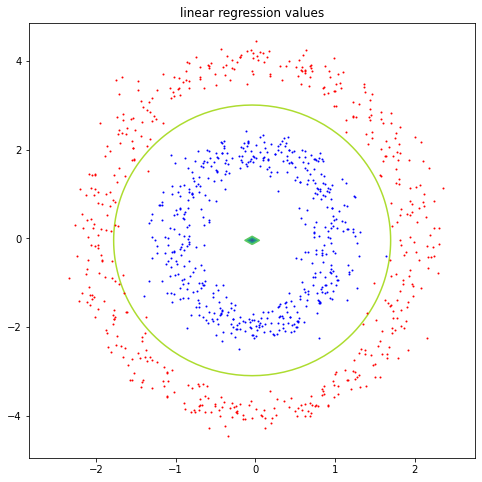

In [25]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # k=compute_linear_regression(theta1,compute_feature1(data1_point))
    # k1=k[:500]
    # k2 = k[500:]
    # #plt.plot(newk[:,0],newk[:,1],'o',markersize=4,color='blue')
    # plt.plot(k1,'o',markersize=4,color='blue')
    # plt.plot(k2,'o',markersize=4,color='red')

    # #for i in range(1000):
    #     #if(compute_linear_regression(theta1,compute_feature1(np.array([[XX,YY][i]])))==0):
    #         #a.append(XX,YY)
    # #print(a)
    # newX = np.arange(0,500,0.1)
    # newY = np.arange(0,1,0.1/500)
    # plt.plot(newX,newY,'-')
    # plt.axis('equal')
    # plt.legend()
    # plt.tight_layout()
    # plt.show()
    
    # x_num=int(np.round(10*(max_x+1-min_x),0))
    # y_num =int(np.round(10*(max_y+1-min_y),0))
    # k=np.zeros([y_num,x_num])
    # print(k.shape)
    # x = []
    # y = []
    # print(XX.shape,YY.shape)
    # for i in range(1,y_num):
    #      for j in range(1,x_num):
    #          newx =(min_x-0.5) + 0.1*j
    #          newy = (min_y-0.5) + 0.1*i
    #          new_xy=np.array([[newx,newy]])
    #          k[i][j]= compute_linear_regression(theta1, np.array([1,[new_xy]]))
    # zmesh = k
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature1(XY)
    #print(new)
    #print(new[1].shape) #5643
    ones =np.ones([5643])
    #print(XX.shape)
    
    zmesh = compute_linear_regression(theta1,new).reshape(XX.shape)
    
    #print(zmesh)
    
    
            
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    #plt.contour(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,color='black')
    
    




    # XY = np.array([XX.flatten(),YY.flatten()]).T
    
    #
    
   
    # for i in range(1,y_num):
    #     for j in range(1,x_num):
    #         newx =(min_x-0.5) + 0.1*j
    #         newy = (min_y-0.5) + 0.1*i
    #         new_xy=np.array([[newx,newy]])
    #         k[j][i]= compute_linear_regression(theta1, np.array(compute_feature1(new_xy)))
    #         if k[j][i] == 0 :
    #             x.append(j)
    #             y.append(i)
    # zmesh = k

    
    # plt.plot(k[:,0],k[:,1], 'o', markersize=4, color='blue')
    # #h=plt.contourf(XX,YY,zmesh.T, levels = 1000 , cmap ="RdBu_r")
    # #plt.colorbar(h)
    # plt.plot(x,y,'-')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    

#min_x   = np.min(data1_point_x)
# max_x   = np.max(data1_point_x)
# min_y   = np.min(data1_point_y)
# max_y   = np.max(data1_point_y)
# X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
# Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

# [XX, YY] = np.meshgrid(X, Y)

#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     #
# XY = np.array([XX.flatten(),YY.flatten()]).T
# k1=np.array(compute_feature1((XY)))
# k=compute_linear_regression(theta1, k1)
# x_num=np.round(10*(max_x+1-min_x),0)
# y_num =np.round(10*(max_y+1-min_y),0)
# print(max_x+0.5,min_x-0.5,max_y+0.5,min_y-0.5)
# print(x_num,y_num)
#print(function_result_09())

(31, 45) (31, 45)
(1395, 2)
(1395,)
[[-47.07950684 -39.27994009 -32.21911788 ...  38.45910625  44.78259169
   51.80885401]
 [-47.47952944 -39.67996269 -32.61914047 ...  38.05908366  44.38256909
   51.40883141]
 [-47.87955204 -40.07998529 -33.01916307 ...  37.65906106  43.98254649
   51.00880882]
 ...
 [-58.28013956 -50.48057281 -43.41975059 ...  27.25847354  33.58195897
   40.6082213 ]
 [-58.68016216 -50.8805954  -43.81977319 ...  26.85845094  33.18193637
   40.2081987 ]
 [-59.08018475 -51.280618   -44.21979579 ...  26.45842834  32.78191378
   39.8081761 ]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


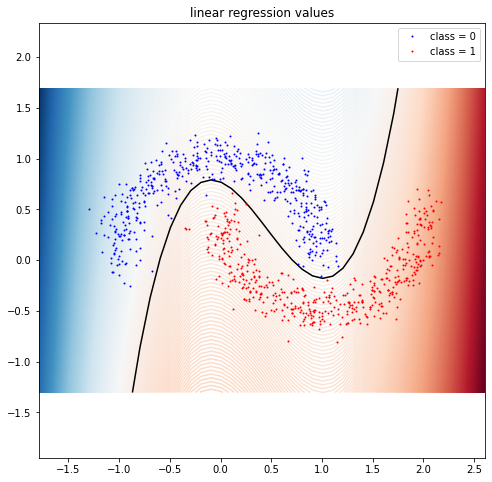

In [26]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    #X = np.arange(min_x - 0.5, max_x + 0.5, (max_x+1-min_x)/1000) 
    #Y = np.arange(min_y - 0.5, max_y + 0.5, (max_y+1-min_y)/1000) 
    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate
    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    #print(new)
    #print(new[1].shape) #5643
    #print(XX.shape,YY.shape)
    XY =np.array([XX.flatten(),YY.flatten()]).T
    #print(XY.shape)
    new=compute_feature2(XY)
    
    #print(new[1].shape)
    
    zmesh = compute_linear_regression(theta2,new).reshape(XX.shape)
    #print(zmesh)
    

    
    
            
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels=1000, cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')
    #plt.contour(XX,YY,compute_linear_regression(theta2,[1,(XY)]))
    #h=plt.contour(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    
    
    
    # x_num=int(np.round(10*(max_x+1-min_x),0))
    # y_num =int(np.round(10*(max_y+1-min_y),0))
    # k=np.zeros([x_num,y_num])
    
    # #for i in range(x_num):
    #     #for j in range(y_num):
    #         #t1=XX[0][i]
    #         #t2 = YY[0][j]
    #         #special_point=compute_feature2(np.asarray([[t1,t2]]))
    #         #k[i][j] =compute_linear_regression(theta2,special_point)
    
    
    # k=compute_linear_regression(theta2,compute_feature2(data2_point))
    # k1=k[:500]
    # k2 = k[500:]
    
    # plt.plot(k1,'o',markersize=4,color='blue')
    # plt.plot(k2,'o',markersize=4,color='red')
    # z=np.zeros([1000,1000])
    # for i in range(1000):
    #     for j in range(1000):
    #         z[i][j]= theta2[0]*1 + np.dot(theta2[1],X[i])+np.dot(theta2[1],Y[j])
    # print(compute_feature2(data2_point)[1].shape)
    # print(z.shape)
    # h=plt.contourf(X/2,compute_feature2(data2_point)[1],z, levels = 50 , cmap ="RdBu_r")
    # plt.xlabel('number for data class 0 is -500')
    # plt.ylabel('linear regression value')
    # plt.colorbar(h)
    # h=plt.contourf(XX,YY,zmesh, levels = 1000 , cmap ="RdBu_r")
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    plt.axis('equal')
    plt.legend()
    
    
    plt.show()
#function_result_10()

## plot the logistic regression values over the 2-dimensional Euclidean space

(99, 57)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\4270424013.py:6: RuntimeWarning: overflow encountered in exp
  value = 1/(1+np.exp(-z))
C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\2299123657.py:35: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')


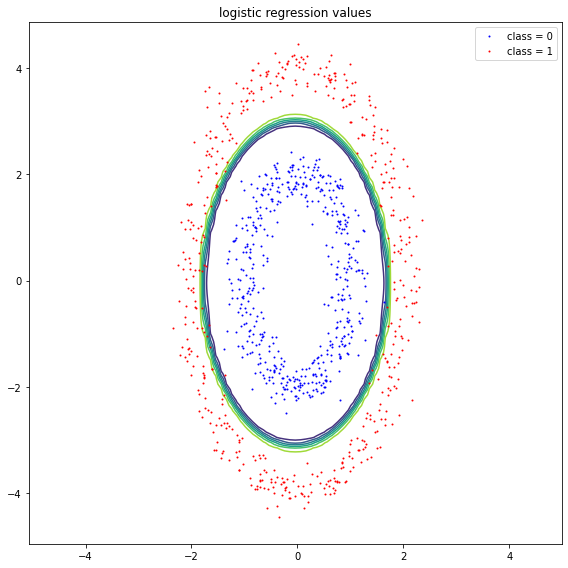

In [27]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature1(XY)
    #print(new)
    #print(new[1].shape) #5643
    
    #print(XX.shape)
    
    zmesh = compute_logistic_regression(theta1,new).reshape(XX.shape)
    
    #print(zmesh)
    
    
            
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    #plt.contour(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,color='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
#function_result_11()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


(31, 45) (31, 45)
(1395, 2)
(1395,)
[[3.57791457e-21 8.72848297e-18 1.01722001e-14 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.39829367e-21 5.85074489e-18 6.81847555e-15 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.60758799e-21 3.92178297e-18 4.57045756e-15 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [4.88941595e-26 1.19279494e-22 1.39008678e-19 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.27739947e-26 7.99536290e-23 9.31781976e-20 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.19685692e-26 5.35933092e-23 6.24578024e-20 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


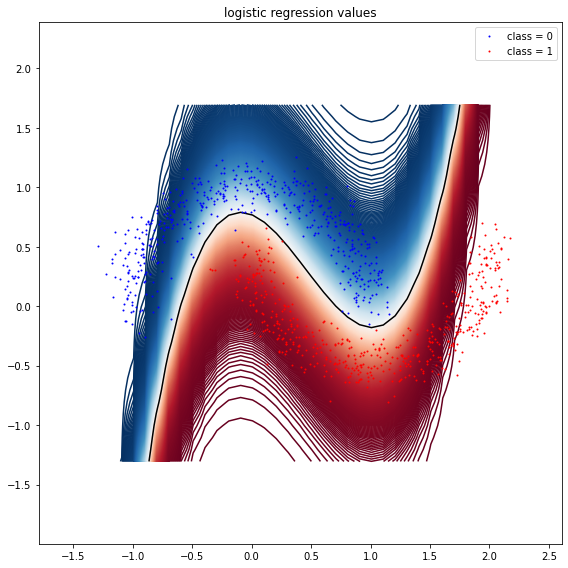

In [33]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #print(XX.shape,YY.shape)
    XY =np.array([XX.flatten(),YY.flatten()]).T
    #print(XY.shape)
    new=compute_feature2(XY)
    
    #print(new[1].shape)
    
    zmesh = compute_logistic_regression(theta2,new).reshape(XX.shape)
    #print(zmesh)
    

    
    
            
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels=1000, cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
#function_result_12()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0012133085
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.1217013830
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  1.0000000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9990000000
**************************************************
## [RESULT 05]
**************************************************


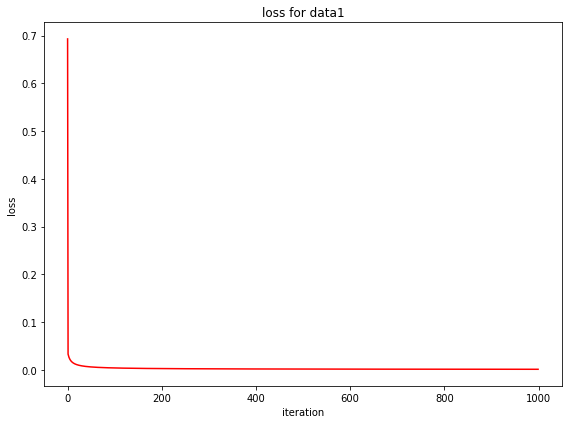

**************************************************
## [RESULT 06]
**************************************************


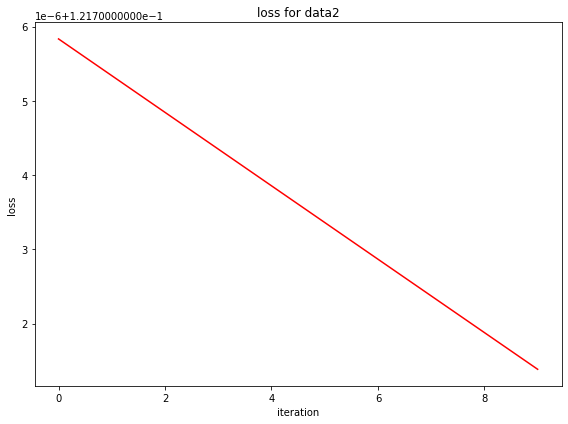

**************************************************
## [RESULT 07]
**************************************************


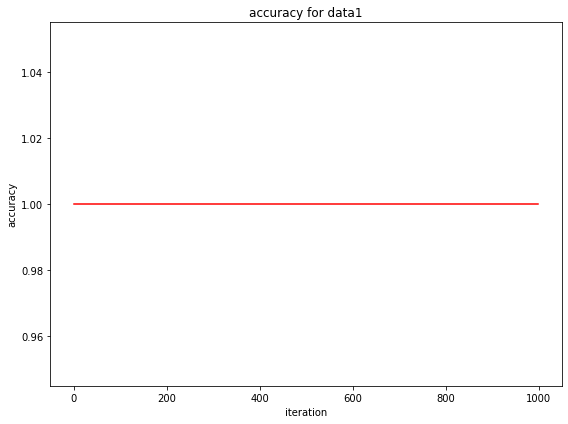

**************************************************
## [RESULT 08]
**************************************************


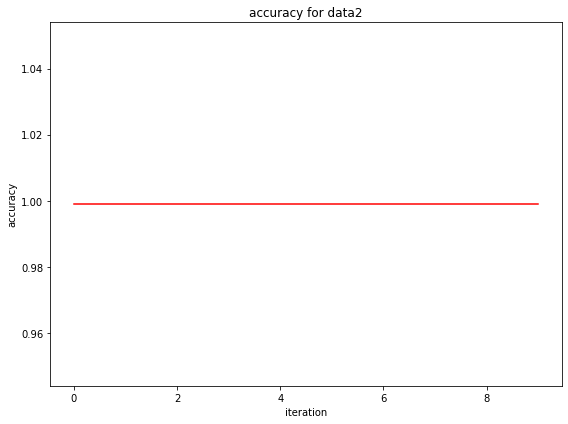

**************************************************
## [RESULT 09]
**************************************************
(99, 57)
[[53.31330592 52.15243299 50.99299948 ... 50.99299948 52.15243299
  53.31330592]
 [52.65413735 51.46896794 50.2843644  ... 50.2843644  51.46896794
  52.65413735]
 [51.99529714 50.78532568 49.57498868 ... 49.57498868 50.78532568
  51.99529714]
 ...
 [51.99529714 50.78532568 49.57498868 ... 49.57498868 50.78532568
  51.99529714]
 [52.65413735 51.46896794 50.2843644  ... 50.2843644  51.46896794
  52.65413735]
 [53.31330592 52.15243299 50.99299948 ... 50.99299948 52.15243299
  53.31330592]]
**************************************************
## [RESULT 10]
**************************************************
(31, 45) (31, 45)
(1395, 2)
(1395,)
[[-47.07950684 -39.27994009 -32.21911788 ...  38.45910625  44.78259169
   51.80885401]
 [-47.47952944 -39.67996269 -32.61914047 ...  38.05908366  44.38256909
   51.40883141]
 [-47.87955204 -40.07998529 -33.01916307 ...  37.659061

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\14898931.py:71: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


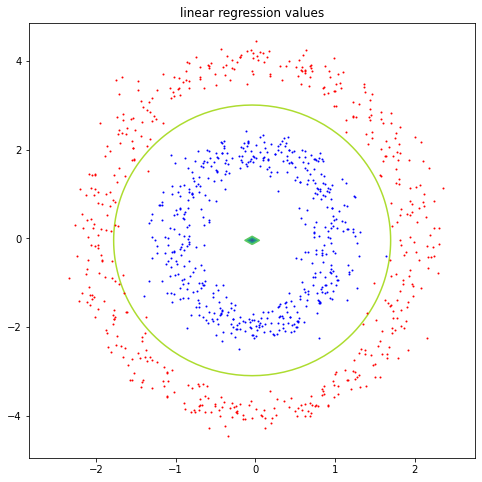

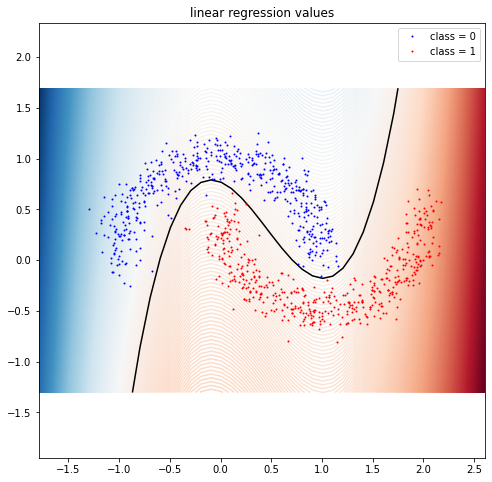

**************************************************
## [RESULT 11]
**************************************************
(99, 57)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\4270424013.py:6: RuntimeWarning: overflow encountered in exp
  value = 1/(1+np.exp(-z))
C:\Users\hajee\AppData\Local\Temp\ipykernel_18388\2299123657.py:35: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')


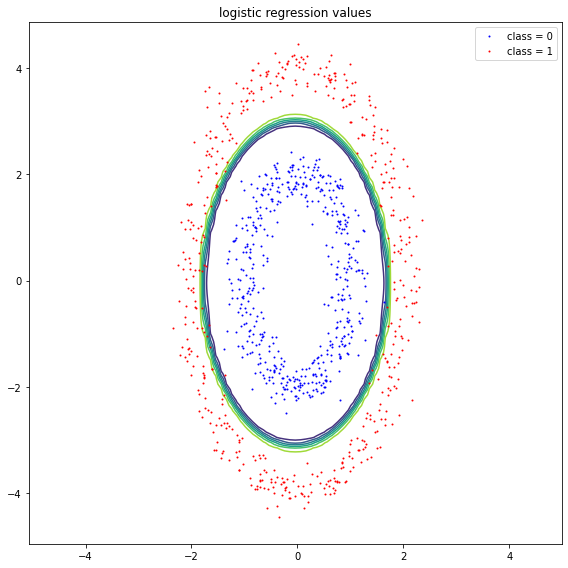

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


**************************************************
## [RESULT 12]
**************************************************
(31, 45) (31, 45)
(1395, 2)
(1395,)
[[3.57791457e-21 8.72848297e-18 1.01722001e-14 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.39829367e-21 5.85074489e-18 6.81847555e-15 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.60758799e-21 3.92178297e-18 4.57045756e-15 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [4.88941595e-26 1.19279494e-22 1.39008678e-19 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.27739947e-26 7.99536290e-23 9.31781976e-20 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.19685692e-26 5.35933092e-23 6.24578024e-20 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


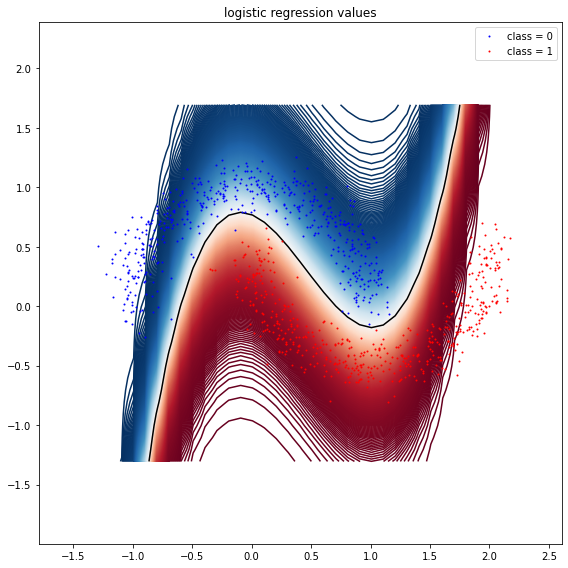

In [29]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)